## Data Exploration

### Import libraries

In [1]:
import os
import sys
import pandas as pd
import seaborn as sns

### Import dataset

In [2]:
project_path = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_path not in sys.path:
    sys.path.append(project_path)

In [3]:
matthews_df = os.path.join(project_path, "data", "raw", "matthews_auston.csv")
df = pd.read_csv(matthews_df)
df.head(5)

,playerId,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8479318,2016,Auston Matthews,2016020001,TOR,OTT,AWAY,20161012,C,other,...,0.000,0.176,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8479318,2016,Auston Matthews,2016020001,TOR,OTT,AWAY,20161012,C,all,...,1.082,1.820,52.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8479318,2016,Auston Matthews,2016020001,TOR,OTT,AWAY,20161012,C,5on5,...,1.033,1.266,44.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8479318,2016,Auston Matthews,2016020001,TOR,OTT,AWAY,20161012,C,4on5,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8479318,2016,Auston Matthews,2016020001,TOR,OTT,AWAY,20161012,C,5on4,...,0.049,0.000,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Pivot table

In [4]:
from utils.data_cleaning import pivot_df

index = ["playerId", "season", "name", "gameId", "playerTeam", "opposingTeam", "home_or_away", "gameDate", "position"]
pivot = "situation"
df = pivot_df(df, index, pivot)
df = df.rename(columns={"gameScore_all": "gameScore"})

### Dataset overview

In [5]:
df.describe()

,playerId,season,gameId,gameDate,I_F_blockedShotAttempts_4on5,I_F_blockedShotAttempts_5on4,I_F_blockedShotAttempts_5on5,I_F_blockedShotAttempts_all,I_F_blockedShotAttempts_other,I_F_dZoneGiveaways_4on5,...,xGoalsAgainstAfterShifts_4on5,xGoalsAgainstAfterShifts_5on4,xGoalsAgainstAfterShifts_5on5,xGoalsAgainstAfterShifts_all,xGoalsAgainstAfterShifts_other,xGoalsForAfterShifts_4on5,xGoalsForAfterShifts_5on4,xGoalsForAfterShifts_5on5,xGoalsForAfterShifts_all,xGoalsForAfterShifts_other
count,629.0,629.000000,6.290000e+02,6.290000e+02,629.000000,629.000000,629.000000,629.000000,629.000000,629.0,...,629.000000,629.000000,629.000000,629.0,629.000000,629.000000,629.000000,629.000000,629.0,629.000000
mean,8479318.0,2020.019078,2.020040e+09,2.020678e+07,0.004769,0.303657,0.974563,1.383148,0.089030,0.0,...,0.000064,0.003843,0.029682,0.0,0.001202,0.000237,0.000302,0.023787,0.0,0.003461
std,0.0,2.641466,2.641489e+06,2.696041e+04,0.068951,0.587830,1.026398,1.218659,0.316767,0.0,...,0.001480,0.036469,0.063649,0.0,0.017064,0.005941,0.004699,0.060452,0.0,0.045936
min,8479318.0,2016.000000,2.016020e+09,2.016101e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,8479318.0,2018.000000,2.018020e+09,2.018120e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,8479318.0,2020.000000,2.020021e+09,2.021033e+07,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,8479318.0,2022.000000,2.022021e+09,2.023032e+07,0.000000,0.000000,2.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.028000,0.0,0.000000,0.000000,0.000000,0.016000,0.0,0.000000
max,8479318.0,2024.000000,2.024021e+09,2.025042e+07,1.000000,3.000000,6.000000,7.000000,2.000000,0.0,...,0.037000,0.777000,0.640000,0.0,0.402000,0.149000,0.106000,0.563000,0.0,0.930000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Columns: 744 entries, playerId to xGoalsForAfterShifts_other
dtypes: float64(735), int64(4), object(5)
memory usage: 3.6+ MB


In [7]:
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of samples: 629
Number of features: 744


### Missing values

In [8]:
if df.isna().any().any():
    nan_counts = df.isna().sum()
    nan_counts = nan_counts[nan_counts > 0]
    print("Missing values detected:\n")
    print(nan_counts)
else:
    print("No missing values found.")

No missing values found.


### Feature Uniqueness

In [9]:
nunique = df.nunique()

const_cols = nunique[nunique==1].index.tolist()
id_cols = nunique[nunique==len(df)].index.tolist()

print("Constant columns:", const_cols)
print("ID columns:", id_cols)

df = df.drop(columns=const_cols + id_cols)

Constant columns: ['playerId', 'name', 'playerTeam', 'position', 'I_F_dZoneGiveaways_4on5', 'I_F_giveaways_4on5', 'I_F_highDangerGoals_4on5', 'I_F_mediumDangerGoals_4on5', 'I_F_penalityMinutes_other', 'I_F_playStopped_4on5', 'I_F_reboundGoals_4on5', 'I_F_reboundxGoals_4on5', 'I_F_secondaryAssists_4on5', 'OnIce_F_highDangerGoals_4on5', 'OnIce_F_mediumDangerGoals_4on5', 'OnIce_F_reboundGoals_4on5', 'corsiAgainstAfterShifts_all', 'corsiForAfterShifts_all', 'fenwickAgainstAfterShifts_all', 'fenwickForAfterShifts_all', 'penalityMinutes_other', 'penalties_other', 'xGoalsAgainstAfterShifts_all', 'xGoalsForAfterShifts_all']
ID columns: ['gameId', 'gameDate']


In [12]:
df.sort_values(by="gameScore", ascending=False).head()

,season,opposingTeam,home_or_away,I_F_blockedShotAttempts_4on5,I_F_blockedShotAttempts_5on4,I_F_blockedShotAttempts_5on5,I_F_blockedShotAttempts_all,I_F_blockedShotAttempts_other,I_F_dZoneGiveaways_5on4,I_F_dZoneGiveaways_5on5,...,timeOnBench_all,timeOnBench_other,xGoalsAgainstAfterShifts_4on5,xGoalsAgainstAfterShifts_5on4,xGoalsAgainstAfterShifts_5on5,xGoalsAgainstAfterShifts_other,xGoalsForAfterShifts_4on5,xGoalsForAfterShifts_5on4,xGoalsForAfterShifts_5on5,xGoalsForAfterShifts_other
0,2016,OTT,AWAY,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2580.0,65.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000
547,2023,WSH,AWAY,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2425.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000
532,2023,ANA,HOME,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2708.0,137.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.019
375,2021,NJD,HOME,0.0,1.0,2.0,3.0,0.0,0.0,0.0,...,2300.0,14.0,0.0,0.0,0.244,0.0,0.0,0.0,0.00,0.000
406,2021,DET,AWAY,0.0,0.0,2.0,2.0,0.0,0.0,0.0,...,2727.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.05,0.000


Auston Matthews ha ottenuto il punteggio più alto in Game Score alla partita di debutto (vs Ottawa), nel quale ha segnato quattro goal.

## Univariate analysis

In [7]:
df = df[df["situation"]=="all"]
feature = "gameScore"

### Statistics

In [9]:
df["gameScore"].describe()

count    629.000000
mean       1.353172
std        1.004016
min       -1.120000
25%        0.635000
50%        1.220000
75%        1.995000
max        4.840000
Name: gameScore, dtype: float64

In [ ]:
from scipy.stats import skew, kurtosis

print(f"Mean: {df[feature].mean():.3f}")
print(f"Variance: {df[feature].var():.3f}")
print(f"Standard deviation: {df[feature].std(ddof=0):.3f}")
print(f"Skewness: {skew(df[feature]):.3f}")
print(f"Kurtosis: {kurtosis(df[feature])+3:.3f}")

Mean: 1.353
Variance: 1.008
Standard deviation: 1.003
Skewness: 0.473
Kurtosis: 2.998


### Grouped Frequency Table

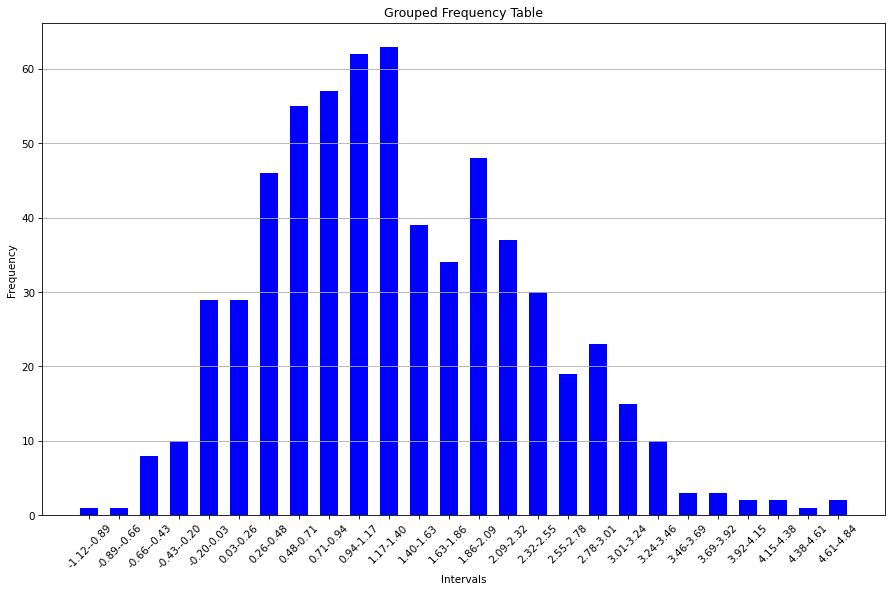

In [31]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.histogram_bin_edges(df[feature], bins="sqrt")
frequencies, edges = np.histogram(df[feature], bins=bins)
    
labels = [f"{edges[i]:.2f}-{edges[i+1]:.2f}" for i in range(len(edges)-1)]
    
plt.figure(figsize=(12,8))
plt.bar(labels, frequencies, width=0.6)
plt.xticks(rotation=45)
plt.xlabel("Intervals")
plt.ylabel("Frequency")
plt.title(f"Grouped Frequency Table")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Cumulative Distribution Function

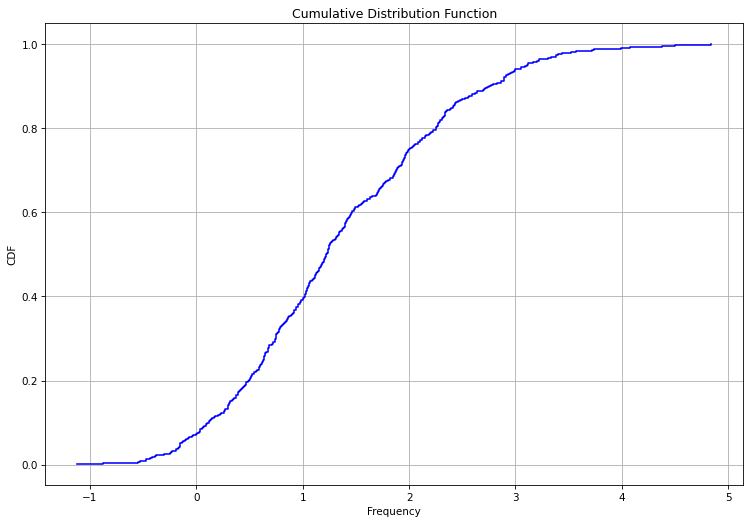

In [35]:
from empiricaldist import Cdf

cdf = Cdf.from_seq(df[feature])

plt.figure(figsize=(12,8))
cdf.step()
plt.title("Cumulative Distribution Function")
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("CDF")
plt.show()

In [36]:
from utils.thinkstats import median, iqr, quartile_skewness

print(f"Median: {median(cdf):.3f}")
print(f"Interquartile range: {iqr(cdf):.3f}")
print(f"Quartile skewness: {quartile_skewness(cdf):.3f}")

Median: 1.220
Interquartile range: 1.360
Quartile skewness: 0.140


In [16]:
df.corr(numeric_only = True)

,playerId,season,gameId,gameDate,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
playerId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,NaN,1.000000,1.000000,0.986111,0.397881,-0.023530,0.164714,0.079525,-0.086812,0.042921,...,-0.193958,-0.087767,-0.295329,-0.076762,NaN,NaN,NaN,NaN,NaN,NaN
gameId,NaN,1.000000,1.000000,0.986129,0.397874,-0.023536,0.164716,0.079520,-0.086815,0.042914,...,-0.193959,-0.087763,-0.295330,-0.076756,NaN,NaN,NaN,NaN,NaN,NaN
gameDate,NaN,0.986111,0.986129,1.000000,0.399112,-0.028620,0.165548,0.074506,-0.083676,0.037469,...,-0.191859,-0.089156,-0.297627,-0.085663,NaN,NaN,NaN,NaN,NaN,NaN
icetime,NaN,0.397881,0.397874,0.399112,1.000000,0.471997,0.038192,0.019404,-0.054280,0.136317,...,-0.199514,-0.139328,-0.202565,-0.304116,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xGoalsAgainstAfterShifts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
corsiForAfterShifts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
corsiAgainstAfterShifts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fenwickForAfterShifts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NameError: name 'plt' is not defined

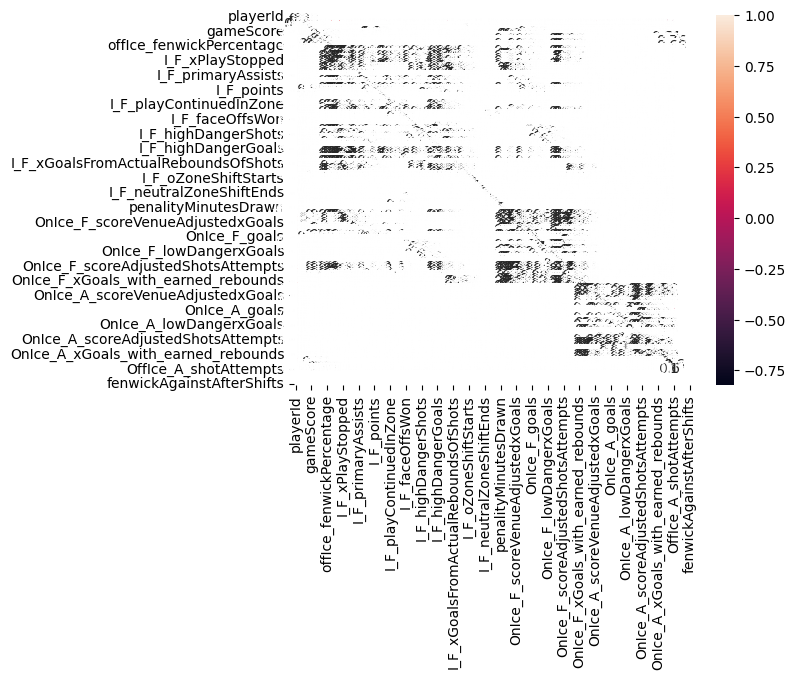

In [18]:
sns.heatmap(df.corr(numeric_only = True), annot=True)

plt.rsParams['figure.figsize'] = (10,7)
plt.show()